In [139]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from imblearn import over_sampling

sns.set(rc={'figure.figsize':(16,8)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.23.1
pandas version :  1.4.3
seaborn version :  0.12.2


In [140]:
data = pd.read_csv('datasets/INdata.csv')
data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं..."
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...
3,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...
4,kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...


In [141]:
data.shape

(37352, 16)

In [142]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37352 entries, 0 to 37351
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                37352 non-null  object
 1   trending_date           37352 non-null  object
 2   title                   37352 non-null  object
 3   channel_title           37352 non-null  object
 4   category_id             37352 non-null  int64 
 5   publish_time            37352 non-null  object
 6   tags                    37352 non-null  object
 7   views                   37352 non-null  int64 
 8   likes                   37352 non-null  int64 
 9   dislikes                37352 non-null  int64 
 10  comment_count           37352 non-null  int64 
 11  thumbnail_link          37352 non-null  object
 12  comments_disabled       37352 non-null  bool  
 13  ratings_disabled        37352 non-null  bool  
 14  video_error_or_removed  37352 non-null  bool  
 15  de

Explanation as to why we are going to drop some columns
1. video_id is just metadata and provides no insight into the views
2. Since the dataset is about the trending videos, this date is not relevant to the prediction model
3. Thumnnail links are just metadata and provide no information about the predictions
4. vide_error_or_removed are just metadata and provide no information about the video

In [143]:
data = data.drop(['video_id', 'trending_date', 'thumbnail_link', 'video_error_or_removed'], axis=1)
print(data.shape)

(37352, 12)


In [144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37352 entries, 0 to 37351
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   title              37352 non-null  object
 1   channel_title      37352 non-null  object
 2   category_id        37352 non-null  int64 
 3   publish_time       37352 non-null  object
 4   tags               37352 non-null  object
 5   views              37352 non-null  int64 
 6   likes              37352 non-null  int64 
 7   dislikes           37352 non-null  int64 
 8   comment_count      37352 non-null  int64 
 9   comments_disabled  37352 non-null  bool  
 10  ratings_disabled   37352 non-null  bool  
 11  description        36791 non-null  object
dtypes: bool(2), int64(5), object(5)
memory usage: 2.9+ MB


CONCLUSIONS

1. Dataframe have 16 columns. After we dropped the above 4 columns, 12 left.
2. Dataframe have 37352 rows
3. Total categorical columns are 7 columns
4. Total numerical columns are 5 columns
5. Views column is the target for this dataset

In [145]:
cats = ['title','channel_title','publish_time','tags','comments_disabled','ratings_disabled','description']
nums = ['category_id','views','likes','dislikes','comment_count']

data[nums].describe()


,category_id,views,likes,dislikes,comment_count
count,37352.000000,3.735200e+04,3.735200e+04,3.735200e+04,37352.00000
mean,21.576596,1.060478e+06,2.708272e+04,1.665082e+03,2676.99743
std,6.556593,3.184932e+06,9.714510e+04,1.607617e+04,14868.31713
min,1.000000,4.024000e+03,0.000000e+00,0.000000e+00,0.00000
25%,23.000000,1.239155e+05,8.640000e+02,1.080000e+02,81.00000
50%,24.000000,3.045860e+05,3.069000e+03,3.260000e+02,329.00000
75%,24.000000,7.992912e+05,1.377425e+04,1.019250e+03,1285.00000
max,43.000000,1.254322e+08,2.912710e+06,1.545017e+06,827755.00000


In [146]:
data[cats].describe()

,title,channel_title,publish_time,tags,comments_disabled,ratings_disabled,description
count,37352,37352,37352,37352,37352,37352,36791
unique,16721,1426,16339,12578,2,2,13992
top,Mission: Impossible - Fallout (2018) - Officia...,VikatanTV,2018-04-21T13:30:01.000Z,[none],False,False,Subscribers Link: http://bit.ly/2qb69dZ\n\nCon...
freq,19,284,18,1381,36148,36571,166


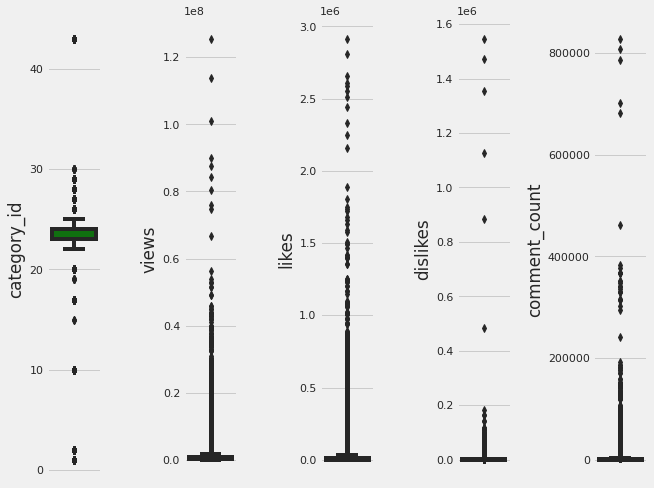

In [147]:
# look at the distribution of data with boxplot
features = ['category_id','views','likes','dislikes','comment_count']
plt.figure(figsize=(15, 7))
for i in range(0, len(features)):
    plt.subplot(1, 8, i+1)
    sns.boxplot(y=data[features[i]],color='green',orient='v')
    plt.tight_layout();
#plt.savefig('fig/boxplot.png')

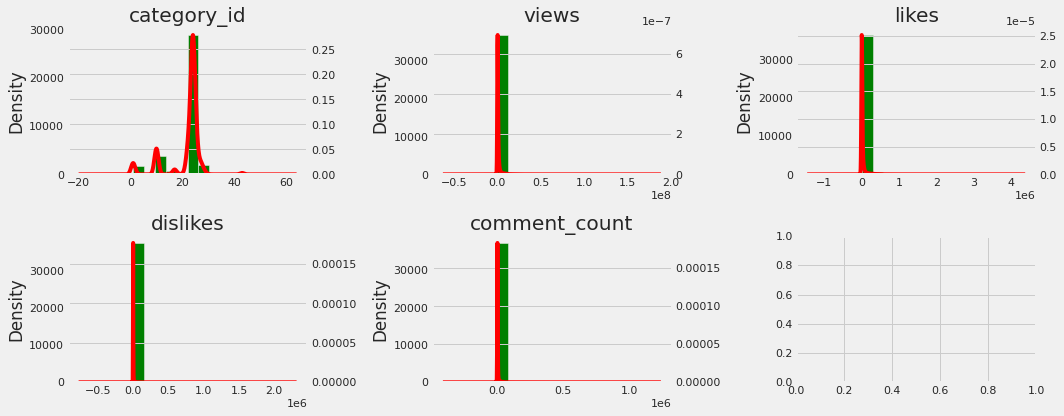

In [148]:
#View data distribution
data_num = data[features]
k = len(data_num.columns)
n = 3
m = (k - 1) // n + 1
fig, axes = plt.subplots(m, n, figsize=(n * 5, m * 3))
for i, (name, col) in enumerate(data_num.iteritems()):
    r, c = i // n, i % n
    ax = axes[r, c]
    col.hist(ax=ax, color='green')
    ax2 = col.plot.kde(ax=ax, secondary_y=True, title=name, color='red')
    ax2.set_ylim(0)

fig.tight_layout()
#plt.savefig('fig/distribusi data.png')


In [149]:
data_cat = data.select_dtypes(include=['object'])

data_cat_unique = data_cat.nunique().reset_index()
data_cat_unique.columns = ['Column_names', 'Count']
data_cat_unique = data_cat_unique.sort_values('Count', ascending=False)
data_cat_unique

,Column_names,Count
0,title,16721
2,publish_time,16339
4,description,13992
3,tags,12578
1,channel_title,1426


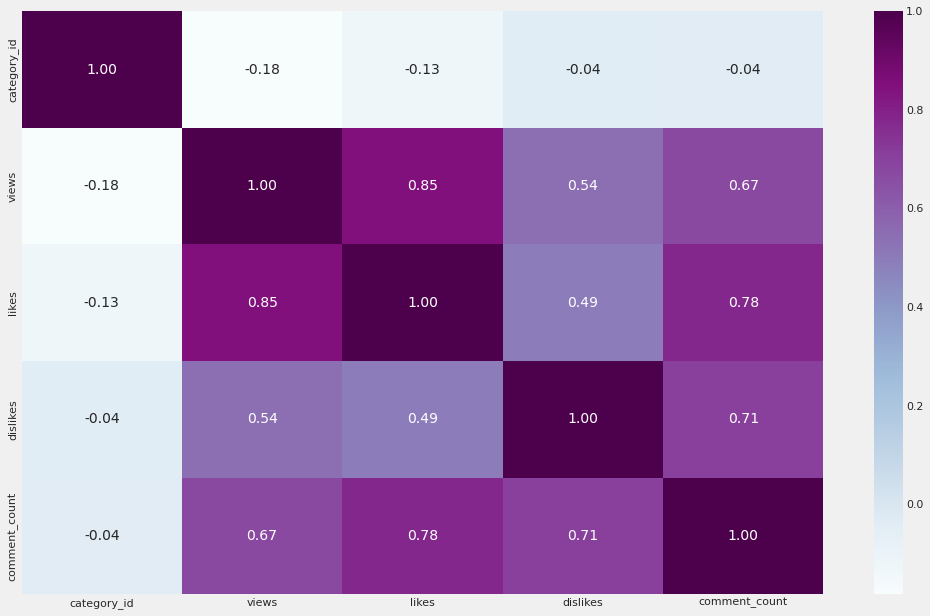

In [150]:
#create a correlation matrix from each numeric data
features = ['category_id','views','likes','dislikes','comment_count']
corr_= data[features].corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr_, annot=True, fmt = ".2f", cmap = "BuPu");
#plt.savefig('fig/heatmap.png');

<Figure size 720x576 with 0 Axes>

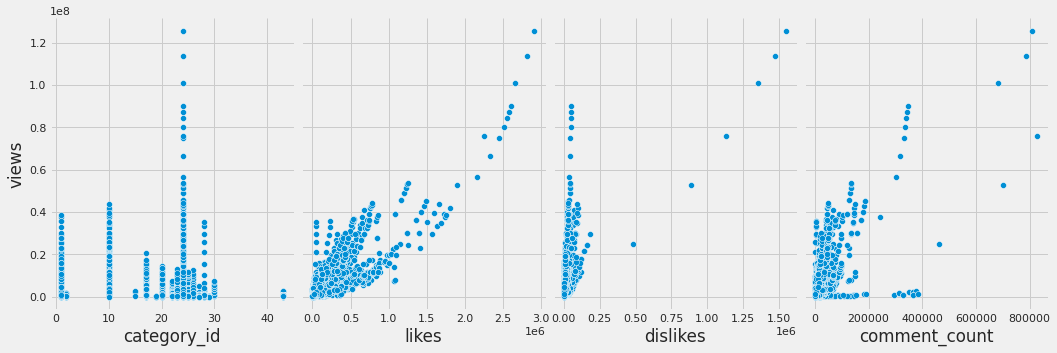

In [151]:
#create a pairplot graph from each numeric data
plt.figure(figsize=(10,8))
sns.pairplot(data=data, x_vars=['category_id','likes','dislikes','comment_count'], y_vars=['views'], height=5, aspect=0.75);
fig.tight_layout();
#plt.savefig('fig/pairplot.png')


In [152]:
#see the number of missing values from the data frame
data_missing_value = data.isnull().sum().reset_index()
data_missing_value.columns = ['feature','missing_value']
data_missing_value

,feature,missing_value
0,title,0
1,channel_title,0
2,category_id,0
3,publish_time,0
4,tags,0
5,views,0
6,likes,0
7,dislikes,0
8,comment_count,0
9,comments_disabled,0


In [153]:
#see the percentage of missing value for each feature
data_missing_value['percentage'] = round((data_missing_value['missing_value']/len(data))*100,2)
data_missing_value = data_missing_value.sort_values('percentage', ascending=False).reset_index(drop=True)
data_missing_value = data_missing_value[data_missing_value['percentage']>0]
data_missing_value

,feature,missing_value,percentage
0,description,561,1.5


In [154]:
data = data.dropna(axis=0)

In [155]:
#see the number of duplicate data
data.duplicated().sum()

4229

In [156]:
#dropping duplicate data
data_clean = data.drop_duplicates()

In [157]:
#see the number of duplicate data
data_clean.duplicated().sum()

0

Handling Outliers

Text(0.5, 0, '')

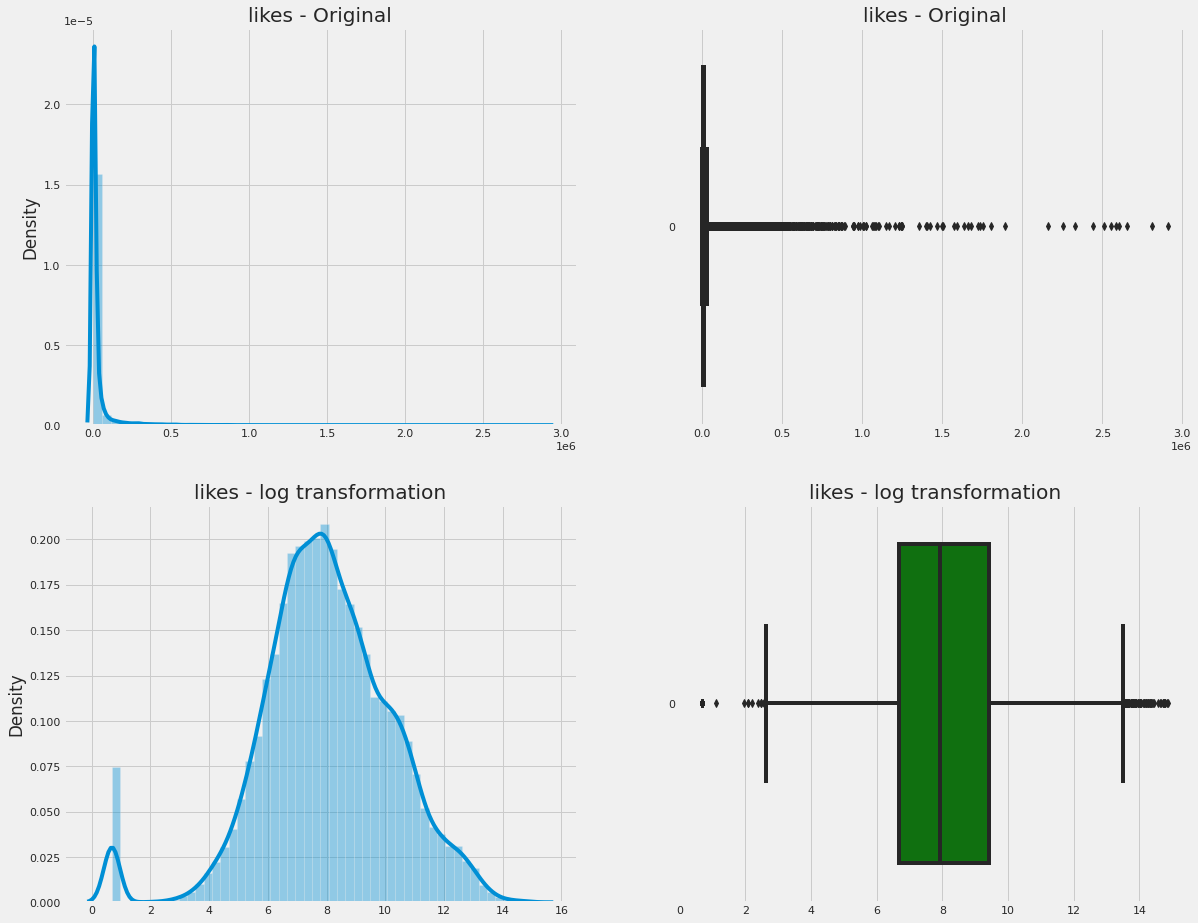

In [158]:
f,ax = plt.subplots(2,2,figsize=(18,15))

g = sns.distplot(data_clean['likes'],kde=True, ax=ax[0,0])
ax[0,0].set_title('likes - Original')
ax[0,0].set_xlabel('')

g = sns.boxplot(data_clean['likes'],color='green',orient='h', ax=ax[0,1])
ax[0,1].set_title('likes - Original')
ax[0,1].set_xlabel('')

g = sns.distplot(np.log1p(data_clean['likes']+1),kde=True, ax=ax[1,0])
ax[1,0].set_title('likes - log transformation')
ax[1,0].set_xlabel('')

g = sns.boxplot(np.log1p(data_clean['likes']+1),color='green',orient='h', ax=ax[1,1])
ax[1,1].set_title('likes - log transformation')
ax[1,1].set_xlabel('')

Text(0.5, 0, '')

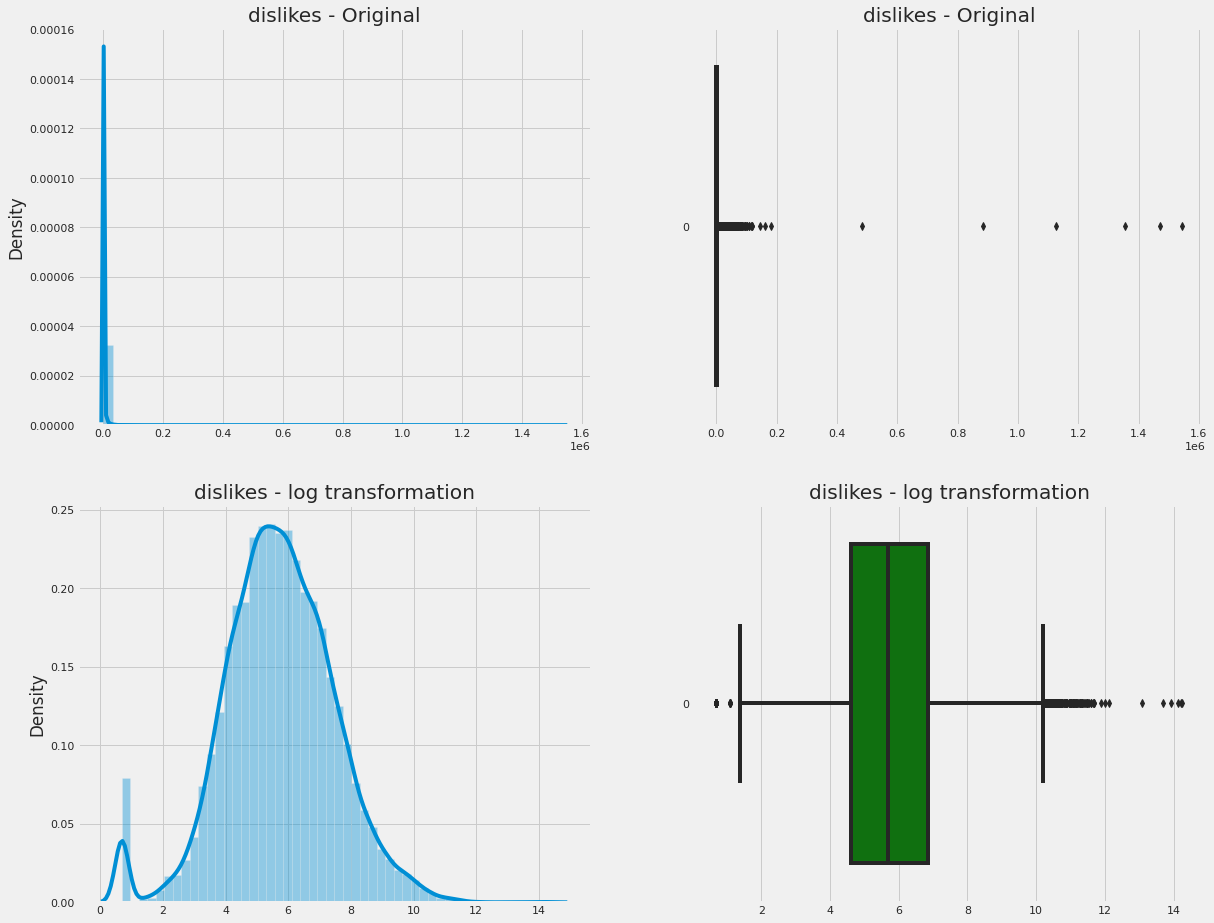

In [159]:
f,ax = plt.subplots(2,2,figsize=(18,15))

g = sns.distplot(data_clean['dislikes'],kde=True, ax=ax[0,0])
ax[0,0].set_title('dislikes - Original')
ax[0,0].set_xlabel('')

g = sns.boxplot(data_clean['dislikes'],color='green',orient='h', ax=ax[0,1])
ax[0,1].set_title('dislikes - Original')
ax[0,1].set_xlabel('')

g = sns.distplot(np.log1p(data_clean['dislikes']+1),kde=True, ax=ax[1,0])
ax[1,0].set_title('dislikes - log transformation')
ax[1,0].set_xlabel('')

g = sns.boxplot(np.log1p(data_clean['dislikes']+1),color='green',orient='h', ax=ax[1,1])
ax[1,1].set_title('dislikes - log transformation')
ax[1,1].set_xlabel('')

Text(0.5, 0, '')

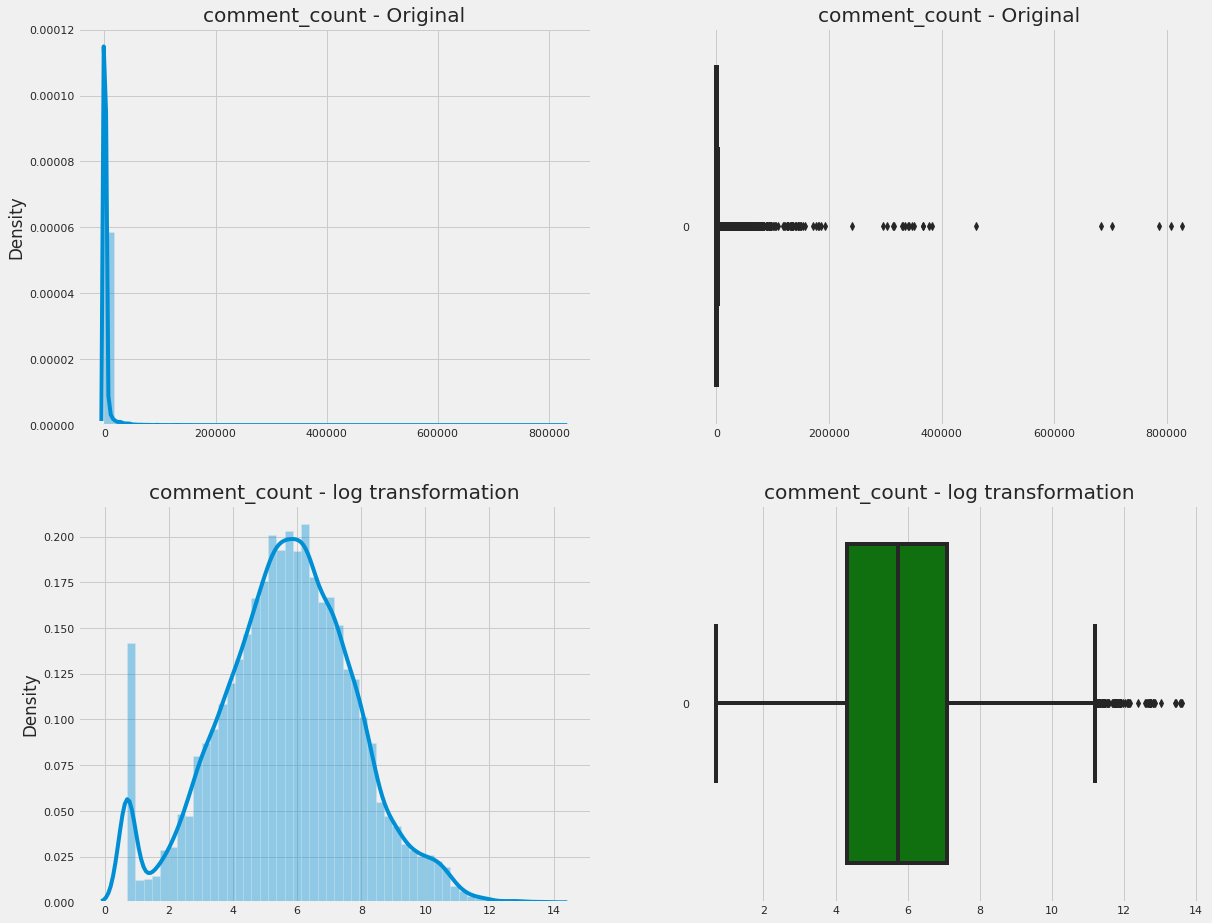

In [160]:
f,ax = plt.subplots(2,2,figsize=(18,15))

g = sns.distplot(data_clean['comment_count'],kde=True, ax=ax[0,0])
ax[0,0].set_title('comment_count - Original')
ax[0,0].set_xlabel('')

g = sns.boxplot(data_clean['comment_count'],color='green',orient='h', ax=ax[0,1])
ax[0,1].set_title('comment_count - Original')
ax[0,1].set_xlabel('')

g = sns.distplot(np.log1p(data_clean['comment_count']+1),kde=True, ax=ax[1,0])
ax[1,0].set_title('comment_count - log transformation')
ax[1,0].set_xlabel('')

g = sns.boxplot(np.log1p(data_clean['comment_count']+1),color='green',orient='h', ax=ax[1,1])
ax[1,1].set_title('comment_count - log transformation')
ax[1,1].set_xlabel('')

Text(0.5, 0, '')

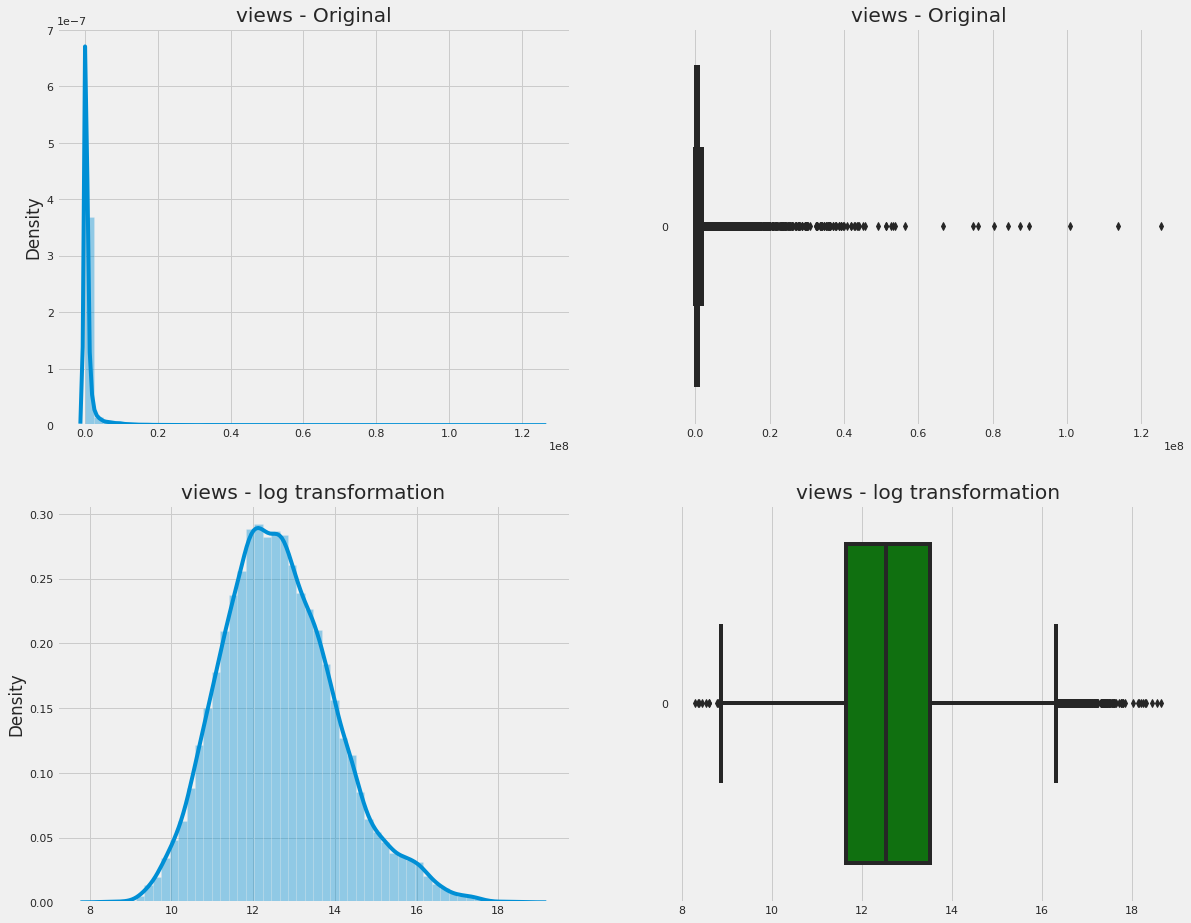

In [161]:
f,ax = plt.subplots(2,2,figsize=(18,15))

g = sns.distplot(data_clean['views'],kde=True, ax=ax[0,0])
ax[0,0].set_title('views - Original')
ax[0,0].set_xlabel('')

g = sns.boxplot(data_clean['views'],color='green',orient='h', ax=ax[0,1])
ax[0,1].set_title('views - Original')
ax[0,1].set_xlabel('')

g = sns.distplot(np.log1p(data_clean['views']+1),kde=True, ax=ax[1,0])
ax[1,0].set_title('views - log transformation')
ax[1,0].set_xlabel('')

g = sns.boxplot(np.log1p(data_clean['views']+1),color='green',orient='h', ax=ax[1,1])
ax[1,1].set_title('views - log transformation')
ax[1,1].set_xlabel('')

In [176]:
features = ['category_id','views','likes','dislikes','comment_count']

df_pre = data_clean.copy()
# for var in features:
#     df_pre[var]= (data_clean[var]+1).apply(np.log)

In [177]:
for var in features:
    df_pre[var]= MinMaxScaler().fit_transform(df_pre[var].values.reshape(len(df_pre), 1))


df_pre.describe()

,category_id,views,likes,dislikes,comment_count
count,32562.000000,32562.000000,32562.000000,32562.000000,32562.000000
mean,0.490534,0.007997,0.008911,0.001034,0.003095
std,0.155367,0.025286,0.033371,0.011023,0.017983
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.523810,0.000878,0.000275,0.000064,0.000089
50%,0.547619,0.002183,0.000967,0.000190,0.000370
75%,0.547619,0.005859,0.004223,0.000610,0.001435
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [178]:
df_pre.head()

,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description
0,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,0.000000,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",0.008709,0.011661,0.000516,0.001066,False,False,Presenting Sharry Mann latest Punjabi Song Cu...
1,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,0.571429,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",0.004673,0.000252,0.000585,0.000000,True,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं..."
2,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,0.547619,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,0.003747,0.000690,0.000157,0.000180,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...
3,Eruma Saani | Tamil vs English,Eruma Saani,0.523810,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",0.009875,0.024154,0.001051,0.003243,False,False,This video showcases the difference between pe...
4,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,0.547619,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",0.003667,0.000169,0.000190,0.000080,False,False,why Samantha became EMOTIONAL @ Samantha naga ...


MODEL BUILDING AND SPLIT

<AxesSubplot:>

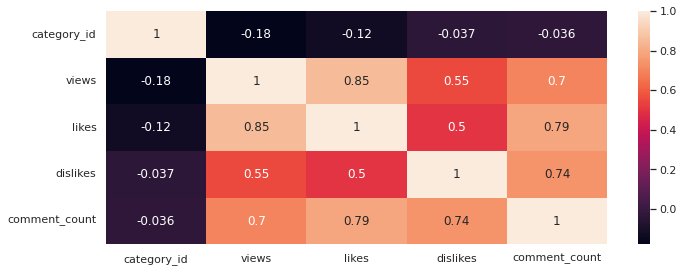

In [179]:
sns.set(rc={'figure.figsize':(10,4)})
sns.heatmap(df_pre[['category_id','views','likes','dislikes','comment_count']].corr(), annot=True)
#plt.savefig('fig/split train test.png')

In [180]:
from sklearn.model_selection import train_test_split

x = df_pre[['category_id','likes','dislikes','comment_count']]
y = df_pre['views']

xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2, random_state=42)

Fitting a simple Linear Regression Model 

In [181]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(xtrain, ytrain)



LinearRegression()

In [182]:
pred = regressor.predict(xtest) #Predicting the views
np.exp(pred) # inverse log transform

array([1.00191243, 1.0017287 , 1.00228727, ..., 1.00196762, 1.00256774,
       1.00256232])

In [183]:


from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def eval_regression(model, pred, xtrain, ytrain, xtest, ytest):
    print("MAE: %.2f" % mean_absolute_error(ytest, pred)) # The MAE
    print("RMSE: %.2f" % mean_squared_error(ytest, pred, squared=False)) # The RMSE
    print('R2 score: %.2f' % r2_score(ytest, pred))


pred = regressor.predict(xtest)

print('Coefficients: \n', regressor.coef_) # The slope
print('Intercept: \n', regressor.intercept_) # The Intercept

eval_regression(regressor, pred, xtrain, ytrain, xtest,ytest)

Coefficients: 
 [-0.01166616  0.63743139  0.54997503 -0.21695497]
Intercept: 
 0.008117632352365655
MAE: 0.00
RMSE: 0.01
R2 score: 0.77


Fitting a Ridge Regularization Model

In [184]:
from sklearn.linear_model import Ridge
ridge_model = Ridge()
ridge_model.fit(xtrain, ytrain)

Ridge()

In [185]:
pred = ridge_model.predict(xtest)

print('Coefficients: \n', ridge_model.coef_) # The slope
print('Intercept: \n', ridge_model.intercept_) # The Intercept

eval_regression(ridge_model, pred, xtrain, ytrain, xtest, ytest)

Coefficients: 
 [-0.0133862   0.56537335  0.29353756 -0.00065967]
Intercept: 
 0.009196790662537336
MAE: 0.00
RMSE: 0.01
R2 score: 0.76


Randomized Search Model

In [186]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

alpha = [200, 230, 250,265, 270, 275, 290, 300, 500] # alpha
hyperparameters = dict(alpha=alpha)

from sklearn.linear_model import Ridge
ridge_model = Ridge()
clf = RandomizedSearchCV(ridge_model, hyperparameters, cv=5, random_state=42, scoring='r2')

#Fitting Model
best_model = clf.fit(xtrain, ytrain)


pred = best_model.predict(xtest)
eval_regression(best_model, pred, xtrain, ytrain, xtest, ytest)

MAE: 0.01
RMSE: 0.02
R2 score: 0.22


Fitting Decision Tree Regression Model

In [187]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(xtrain, ytrain)
pred = dt.predict(xtest)
eval_regression(dt, pred, xtrain, ytrain, xtest, ytest)


MAE: 0.00
RMSE: 0.01
R2 score: 0.88


Random Forest Regression Model

In [188]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=104)
best_model1 = rf.fit(xtrain, ytrain)
pred = rf.predict(xtest)
eval_regression(rf, pred, xtrain, ytrain, xtest, ytest)

MAE: 0.00
RMSE: 0.01
R2 score: 0.92


INFERENCE COMMUNICATION AND RESULTS


Text(0.5, 1.0, 'feature importance score')

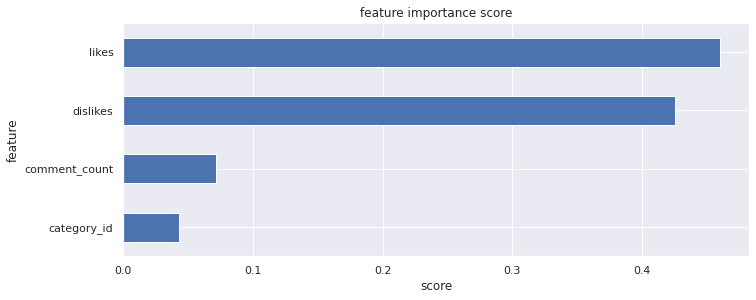

In [189]:
#make feature importance graph
X=data[['category_id','likes','dislikes','comment_count']]
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
ax = feat_importances.nlargest(10).plot(kind='barh')
ax.invert_yaxis()
plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

LIMITATIONS & FUTURE SCOPE

1. Dataset is extremely small in comparision to the available corpus of data. Thus by factoring in more datapoints we can make the model more accurate. We have only used corpus of trending videos in the dataset. So the dataset is more of a 'youtube-treding-predictor' than a 'youtube-virality-predictor'
2. Viral videos are themselves outliers of the dataset, i.e. they garner significantly more number of views compared to the others. By normalizing the dataset further, we can ake the model more accurate towards not only trending videos but also predict the likelihood of the video going viral. 
3. The title and thumbnail of the video are the major contributors towards the viewcount of the video. Thus by not factoring the title and thumbnail, we can make the model more accurate for predicting the potential views of the video.
4. Using NLP and Image-processing techniques, we are confident that we can make an accurate model that can significantly predict the viewcount of videos.